In [1]:
!pip install efficientnet

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from tensorflow.keras.applications import *
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_addons as tfa
from time import time
import glob, warnings
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split
from efficientnet.keras import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from PIL import Image

C:\Users\user\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [3]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


# Load the data and labels from the saved NumPy arrays
data_array = np.load('D:\WESAD_code\WESAD_final\Subject_array\data_array.npy')
labels_array = np.load('D:\WESAD_code\WESAD_final\Labels_array\label_array.npy')

In [4]:
print(data_array.shape)
print(labels_array.shape)

(16492, 224, 224, 3)
(16492, 3)


In [5]:
####SEED_0

import numpy as np
from sklearn.model_selection import train_test_split

# Assuming the dataset is stored in the variable `data_array` and the corresponding labels in `labels_array`

# Splitting the dataset into 75% training, 5% validation, and 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(data_array, labels_array, test_size=0.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.0625, random_state=3)

# Checking the shape of each set
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (12368, 224, 224, 3)
Training labels shape: (12368, 3)
Validation data shape: (825, 224, 224, 3)
Validation labels shape: (825, 3)
Testing data shape: (3299, 224, 224, 3)
Testing labels shape: (3299, 3)


In [6]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [7]:
import tensorflow as tf

IMG_SIZE = 224
n_CLASS = 3

pretrained_model =    tf.keras.applications.efficientnet.EfficientNetB0(
            input_shape = (IMG_SIZE, IMG_SIZE, 3),
            include_top = False,
            weights='imagenet',
            drop_connect_rate=0.6,
        )
pretrained_model.trainable = False

def create_model():
    x = pretrained_model.output
    x = GlobalAveragePooling2D()(x)
    # Add a fully connected layer
    x = Dense(128, activation='relu')(x)
    # Add a final softmax layer
    predictions = Dense(n_CLASS, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=pretrained_model.input, outputs=predictions)

    return model

leaf_model = create_model()

In [8]:
leaf_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 56, 56, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_a

 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
          

                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_s

 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 14, 14, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_a

                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 7, 7, 1152)  10368       ['block7a_expand_activation[0][0]
 D)       

In [9]:
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

leaf_model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.0001),
              metrics = 'accuracy')


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 1,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-7,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath ='./Efnet_model1_FALSE3.hdf5',
                                                  monitor = 'val_accuracy',
                                                  verbose = 1,
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')


In [10]:
int_epoch = 15
callbacks = [earlystopping, reduce_lr, checkpointer]

history = leaf_model.fit(x=X_train,
                         y=y_train,
                         validation_data=(X_val, y_val),  # Using test set as validation data
                         epochs=int_epoch,
                         callbacks=callbacks)

Epoch 1/15
387/387 [==============================] - ETA: 0s - loss: 0.8053 - accuracy: 0.6523
Epoch 1: val_accuracy improved from -inf to 0.69091, saving model to .\Efnet_model1_FALSE3.hdf5
387/387 [==============================] - 357s 907ms/step - loss: 0.8053 - accuracy: 0.6523 - val_loss: 0.7139 - val_accuracy: 0.6909 - lr: 0.0010
Epoch 2/15
387/387 [==============================] - ETA: 0s - loss: 0.7542 - accuracy: 0.6807
Epoch 2: val_accuracy improved from 0.69091 to 0.72121, saving model to .\Efnet_model1_FALSE3.hdf5
387/387 [==============================] - 337s 871ms/step - loss: 0.7542 - accuracy: 0.6807 - val_loss: 0.6778 - val_accuracy: 0.7212 - lr: 0.0010
Epoch 3/15
387/387 [==============================] - ETA: 0s - loss: 0.7279 - accuracy: 0.6921
Epoch 3: val_accuracy improved from 0.72121 to 0.72364, saving model to .\Efnet_model1_FALSE3.hdf5
387/387 [==============================] - 331s 856ms/step - loss: 0.7279 - accuracy: 0.6921 - val_loss: 0.6446 - val_accu

In [11]:
print("Not using Gradient Centralization:")
print(f"Loss: {history.history['loss'][-1]}")
print(f"accuracy: {history.history['accuracy'][-1]}")
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")


Not using Gradient Centralization:
Loss: 0.6500592231750488
accuracy: 0.7292205691337585
Validation accuracy: 0.7599999904632568


In [12]:
acc = history.history['accuracy']
print(max(acc))

0.7323738932609558


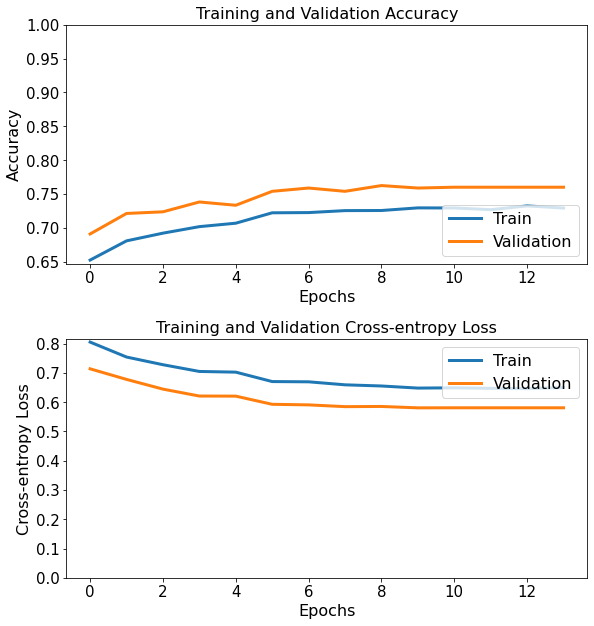

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.tight_layout(pad=3.0)
plt.plot(acc, label='Train' , linewidth = 3)
plt.plot(val_acc, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right' , prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy' , fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)

plt.subplot(2, 1, 2)
plt.tight_layout(pad=3.0)
plt.plot(loss, label='Train', linewidth = 3)
plt.plot(val_loss, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-entropy Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Cross-entropy Loss', fontsize=16)
plt.show()

In [14]:
def load_trained_model(weights_path):
   model = create_model()
   model.load_weights(weights_path)
   return model

In [15]:
new_model = load_trained_model('D:\WESAD_code\Efnet_model1_FALSE3.hdf5')
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']    

 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 56, 56, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_a

 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
          

                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_s

 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 14, 14, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_a

                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 7, 7, 1152)  10368       ['block7a_expand_activation[0][0]
 D)       

In [16]:
from sklearn.metrics import classification_report

y_pred = new_model.predict(X_val)
y_predargmax = np.argmax(y_pred, axis=1)
y_true = y_val

y_pred_categorical = np.zeros_like(y_true)
y_pred_categorical[np.arange(len(y_predargmax)), y_predargmax] = 1


clreport = classification_report(y_true, y_pred_categorical, digits=4)
print(clreport)

              precision    recall  f1-score   support

           0     0.7263    0.9345    0.8174       443
           1     0.8440    0.8508    0.8474       248
           2     0.8000    0.0299    0.0576       134

   micro avg     0.7624    0.7624    0.7624       825
   macro avg     0.7901    0.6051    0.5741       825
weighted avg     0.7737    0.7624    0.7030       825
 samples avg     0.7624    0.7624    0.7624       825



**Testing**

In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_predt = new_model.predict(X_test)
y_predargmaxt = np.argmax(y_predt, axis=1)
y_truet = y_test

# Assuming y_predargmax and y_test are already defined
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer labels
test_accuracy = accuracy_score(y_test_labels, y_predargmaxt)
print("Test Accuracy:", test_accuracy)

y_pred_categoricalt = np.zeros_like(y_truet)
y_pred_categoricalt[np.arange(len(y_predargmaxt)), y_predargmaxt] = 1


clreportt = classification_report(y_truet, y_pred_categoricalt, digits=4)
print(clreportt)

Test Accuracy: 0.7423461655046983
              precision    recall  f1-score   support

           0     0.7014    0.9308    0.8000      1734
           1     0.8354    0.8270    0.8311       994
           2     0.9286    0.0228    0.0444       571

   micro avg     0.7423    0.7423    0.7423      3299
   macro avg     0.8218    0.5935    0.5585      3299
weighted avg     0.7811    0.7423    0.6786      3299
 samples avg     0.7423    0.7423    0.7423      3299



In [18]:
import os
os.chdir(r'D:\WESAD_code')
r'Efnet_model1_FALSE3.hdf5'

'Efnet_model1_FALSE3.hdf5'

In [19]:
from IPython.display import FileLink
FileLink(r'Efnet_model1_FALSE3.hdf5')

D:\WESAD_code\Efnet_model1_FALSE3.hdf5

In [20]:
# auc score
from sklearn.metrics import roc_curve, roc_auc_score

auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
print(auc)

0.8713454497637801


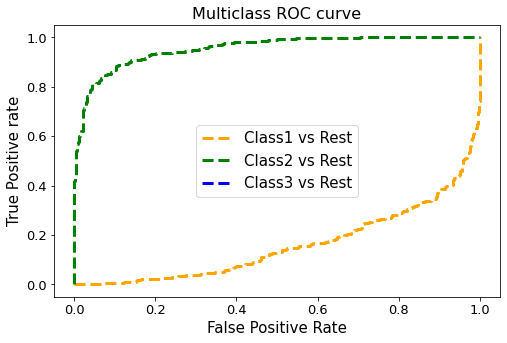

In [21]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3
# classes = ['Class 1','Class 2','Class 3']
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true[:,i], y_pred[:,i], pos_label=i)

# plotting
plt.figure(figsize = (8,5))
colors = ['orange','green','blue']

for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--', linewidth=3, color=colors[i], label='Class{} vs Rest'.format(i+1))
    
plt.title('Multiclass ROC curve',fontsize = 16)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive rate',fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',prop={'size': 15})
plt.show()